# Drills - Evaluating Linear regression

## Drill: Dimensionality Reduction in Linear Regression


by: Melissa N 

In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

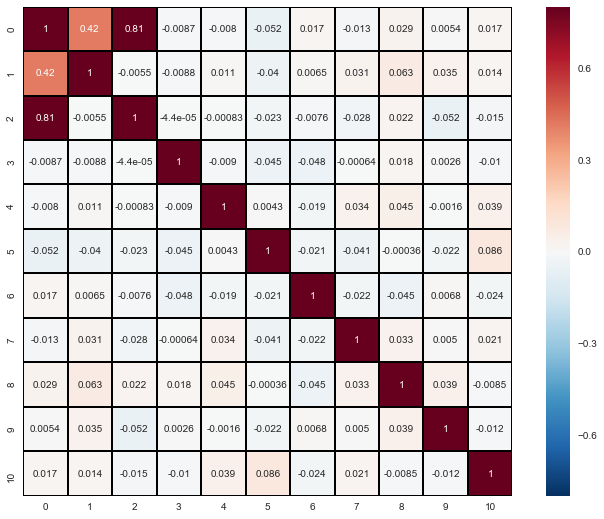

In [2]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8,  linecolor='black', linewidths=1, annot=True, square=True)
plt.show()

R-squared regression: 0.82850991627
R-squared PLSR: 0.8281025592


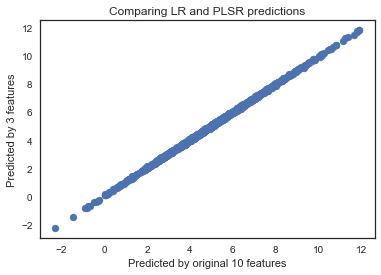

In [3]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

Since this data is randomly generated, you can also play with it by changing how  y  is computed, then observing how different relationships between  y  and  X  play out in PLSR.

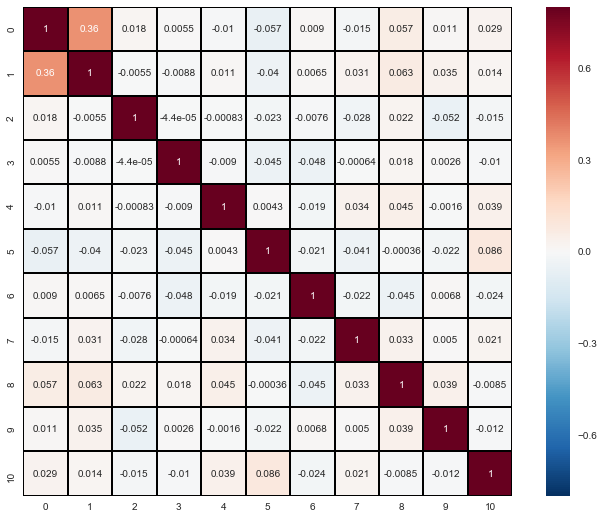

In [6]:
# Your PLSR models here.

# Create normally distributed outcome related to parameters but with noise.
y1 = X[:, 0] +  X[:, 1]**2 + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat1 = pd.DataFrame(np.insert(X, 0, y1, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat1, vmax=.8, linecolor='black', linewidths=1, annot=True, square=True)
plt.show()




R-squared regression: 0.137952410754
R-squared PLSR: -0.576336608141


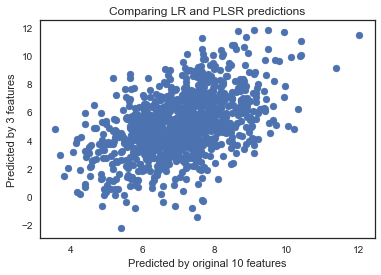

In [7]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y1)

# Save predicted values.
Y_pred1 = regr.predict(X)
print('R-squared regression:', regr.score(X, y1))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1_1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1_1.fit(X, y)

# Save predicted values.
Y_PLS_pred1 = pls1_1.predict(X)
print('R-squared PLSR:', pls1_1.score(X, y1))

# Compare the predictions of the two models
plt.scatter(Y_pred1,Y_PLS_pred1) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()